# Detecting Fraudulent Credit Card Activity
## Using Imbalanced Data

Raw data pulled from [Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud/data)

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve

plt.style.use('fivethirtyeight')
%matplotlib inline

In [4]:
cc_fraud = pd.read_csv('./data/creditcard.csv')

In [5]:
cc_fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


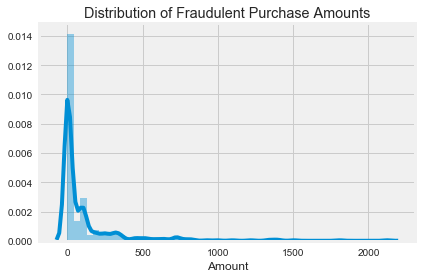

In [60]:
sns.distplot(cc_fraud[(cc_fraud['Class'] == 1)].Amount);
plt.title('Distribution of Fraudulent Purchase Amounts');

In [8]:
cc_fraud['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

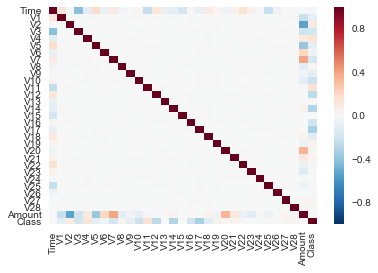

In [10]:

sns.heatmap(cc_fraud.corr());

In [17]:
corr_ranks = cc_fraud.corr()['Class']

In [24]:
ranked = np.abs(corr_ranks).sort_values(ascending=False)
print ranked

V17       0.326481
V14       0.302544
V12       0.260593
V10       0.216883
V16       0.196539
V3        0.192961
V7        0.187257
V11       0.154876
V4        0.133447
V18       0.111485
V1        0.101347
V9        0.097733
V5        0.094974
V2        0.091289
V6        0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
Time      0.012323
V28       0.009536
V24       0.007221
Amount    0.005632
V13       0.004570
V26       0.004455
V15       0.004223
V25       0.003308
V23       0.002685
V22       0.000805
Name: Class, dtype: float64


In [30]:
top_features = list(ranked.index[1:11])
print list(top_features)

['V17', 'V14', 'V12', 'V10', 'V16', 'V3', 'V7', 'V11', 'V4', 'V18']


In [31]:
logit = LogisticRegression()

top_features.append('Amount')


In [63]:
fraud = cc_fraud[(cc_fraud['Class']==1)]
not_fraud = cc_fraud[(cc_fraud['Class']==0)]

fraud_sample = fraud.sample(400)
not_fraud_sample = not_fraud.sample(400)

balanced = fraud_sample.append(not_fraud_sample)
balanced['Class'].value_counts()

1    400
0    400
Name: Class, dtype: int64

In [65]:
X = balanced[top_features]
y = balanced['Class']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [67]:
logit.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [68]:
logit.score(X_test,y_test)

0.94499999999999995

In [69]:
y_logit_pred = logit.predict(X_test)

In [90]:
y_logit_pred_proba = logit.predict_proba(X_test)[:,1]

In [75]:
cfm = confusion_matrix(y_test,y_logit_pred)
cfm

array([[100,   5],
       [  6,  89]])

In [79]:
tpr_calc = cfm[1][1]/float(cfm[1][0]+cfm[1][1])
fpr_calc = cfm[0][1]/float(cfm[0][0]+cfm[0][1])

In [81]:
print 'True Positive Rate (Test Set): ', tpr_calc
print 'False Positive Rate (Test Set): ', fpr_calc

True Positive Rate (Test Set):  0.936842105263
False Positive Rate (Test Set):  0.047619047619


In [83]:
X_all = cc_fraud[top_features]
y_all = cc_fraud['Class']

y_pred_all = logit.predict(X_all)

In [85]:
logit.score(X_all,y_all)

0.96646852078776158

In [86]:
cfm_all = confusion_matrix(y_all,y_pred_all)

In [87]:
tpr_calc_all = cfm_all[1][1]/float(cfm_all[1][0]+cfm_all[1][1])
fpr_calc_all = cfm_all[0][1]/float(cfm_all[0][0]+cfm_all[0][1])

In [89]:
print 'True Positive Rate (All Data): ', tpr_calc_all
print 'False Positive Rate (All Data)): ', fpr_calc_all

True Positive Rate (All Data):  0.912601626016
False Positive Rate (All Data)):  0.0334382638974


[ 0.          0.00952381  0.00952381  0.00952381  0.00952381  0.00952381
  0.00952381  0.01904762  0.01904762  0.04761905  0.04761905  0.0952381
  0.0952381   0.42857143  0.42857143  0.4952381   0.4952381   0.61904762
  0.61904762  1.        ]
[ 0.          0.18947368  0.37894737  0.4         0.6         0.62105263
  0.90526316  0.90526316  0.93684211  0.93684211  0.95789474  0.95789474
  0.96842105  0.96842105  0.97894737  0.97894737  0.98947368  0.98947368
  1.          1.        ]
[  2.00000000e+00   1.00000000e+00   1.00000000e+00   1.00000000e+00
   9.99999814e-01   9.99999783e-01   9.77223138e-01   9.43881776e-01
   7.23571472e-01   5.60169886e-01   4.44181088e-01   3.30421263e-01
   3.28409378e-01   8.90512426e-02   8.60070385e-02   7.10454790e-02
   6.98496584e-02   4.93693122e-02   4.85639658e-02   9.15451061e-05]


[]

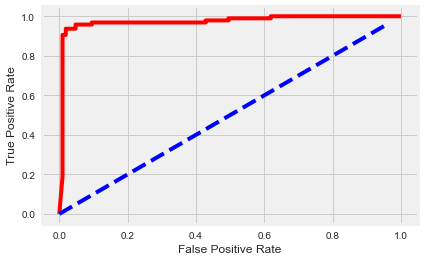

In [91]:
fpr, tpr, threshold = roc_curve(y_test, y_logit_pred_proba, pos_label=1)
print fpr
print tpr
print threshold
plt.plot(fpr,tpr,color='red');
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.plot(np.arange(0,1,.05), np.arange(0,1,.05), 'b--');
plt.plot()